<span style="color:#44f;font-weight:bold;">Codes for CNS2025: Lecture 10</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Some non-trivial distributions

In [2]:
def generate_data(size=1000,control=0,seed=1234):
    ''' Generate fictious data from two overlapping distributions

    Parameters
    ----------
    size:    Number of samples
    control: Control parameter

    Return
    ------
    x:   Measured result (real number)
    y:   Label data (0 or 1)
    '''
    rng = np.random.default_rng(seed)
    y = rng.binomial(1,0.45,size)
    c1 = rng.binomial(1,0.65,size)
    c2 = rng.binomial(1,0.25,size)
    x = (rng.normal(size=size)+c1*4)*(1-y)+(
        (rng.normal(size=size)*2+1.7)*(1-c2)+(rng.uniform(size=size)-0.5)*c2+control
    )*y
    return x,y

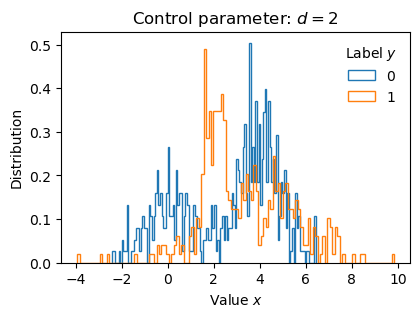

In [3]:
d = 2 # Control parameter
x,y = generate_data(1000,control=d)
f,a = plt.subplots(figsize=(4.5,3))
a.hist(x[y==0],128,histtype='step',label='0',density=True)
a.hist(x[y==1],128,histtype='step',label='1',density=True)
a.set_xlabel('Value $x$')
a.set_ylabel('Distribution')
a.legend(title='Label $y$',frameon=False)
a.set_title(f'Control parameter: $d={d}$')
plt.show()

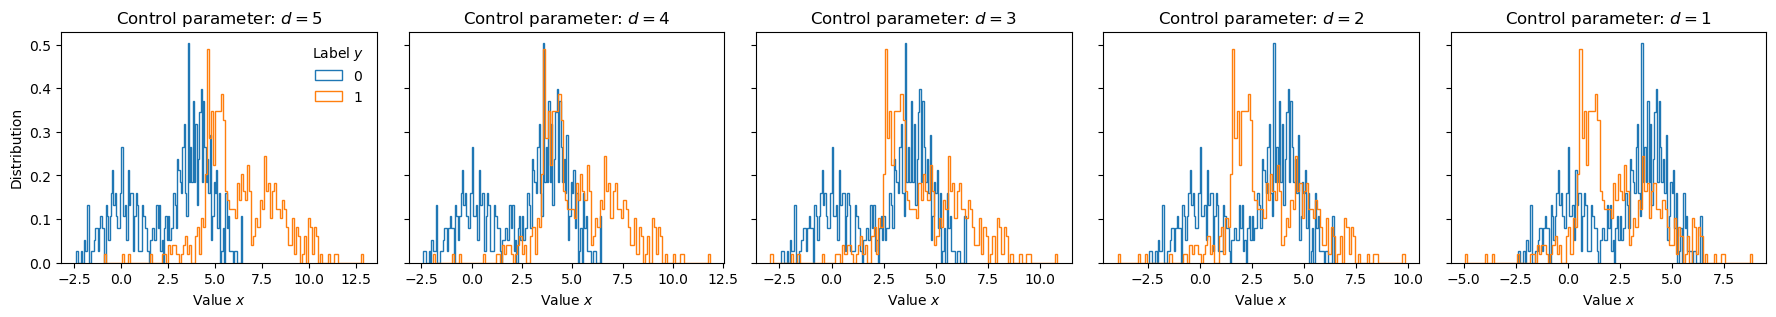

In [4]:
f,aa = plt.subplots(1,5,figsize=(22,3),sharey=True)
f.subplots_adjust(wspace=0.1)
for a,d in zip(aa,[5,4,3,2,1]):
    x,y = generate_data(1000,control=d)
    a.hist(x[y==0],128,histtype='step',label='0',density=True)
    a.hist(x[y==1],128,histtype='step',label='1',density=True)
    a.set_xlabel('Value $x$')
    a.set_title(f'Control parameter: $d={d}$')
aa[0].legend(title='Label $y$',frameon=False)
aa[0].set_ylabel('Distribution')
plt.show()

## Probability density functions

In [5]:
# Functions for constructing the exact distribution
def gaussian(x): # Gaussian
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)
def unit_pulse(x): # Unit pulse
    return (x>0)*(x<1)

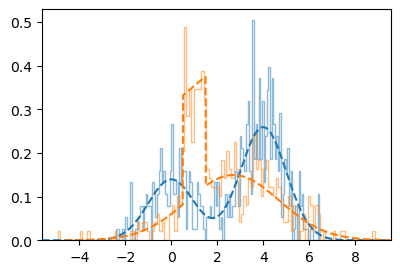

In [6]:
f,a = plt.subplots(figsize=(4.5,3))

# Plot empirical distributions of the data
a.hist(x[y==0],128,histtype='step',label='$y=0$',density=True,alpha=0.5)
a.hist(x[y==1],128,histtype='step',label='$y=1$',density=True,alpha=0.5)
xl = a.get_xlim() # Preserve plotting range

# Plot the analytical ground truth
zs = np.linspace(*xl,1025)
a.plot(zs,0.35*gaussian(zs)+0.65*gaussian(zs-4),'--',color='C0')
a.plot(zs+d,0.75*gaussian((zs-1.7)/2)/2+0.25*unit_pulse(zs+0.5),'--',color='C1')
a.set_xlim(*xl) # Restore the plotting range
plt.show()

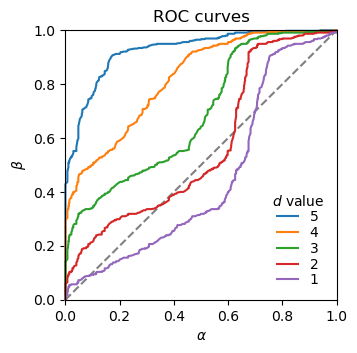

In [7]:
f,a = plt.subplots(figsize=(3.5,3.5))
a.plot([0,1],[0,1],'--',color='gray') # Diagonal line
for d in [5,4,3,2,1]: # Different control parameter values
    x,y = generate_data(1000,control=d)
    zs = np.linspace(x.min(),x.max(),1025)
    alps = [(x[y==0]>z).mean() for z in zs] # alpha(z), size
    bets = [(x[y==1]>z).mean() for z in zs] # beta(z), power
    a.plot(alps,bets,label=fr'${d}$',clip_on=False)
a.legend(title='$d$ value',frameon=False,labelspacing=1/8,handlelength=1.5)
a.set_xlabel(r'$\alpha$')
a.set_ylabel(r'$\beta$')
a.set_xlim(0,1)
a.set_ylim(0,1)
a.set_title('ROC curves')
plt.show()

## Rate of correct prediction of Two-alternative forced choice (2AFC)

Calculate area under the curve $\beta(\alpha)$:
$$
P_\mathrm{opt} = \int_0^1\beta(\alpha)d\alpha
$$
For each index interval `i,i+1` of the list, we can sum 
over the product of $d\alpha$ ~ `alps[i+1]-alps[i]`
and $\beta$ ~ `(bets[i+1]+bets[i])/2` to carry out the integral.

In [8]:
ds = np.arange(-8,13)
ops = [] # Correct prediction rates of 2AFC at different control values
for d in ds:
    x,y = generate_data(control=d)
    alps = np.array([(x[y==0]>z).mean() for z in zs])
    bets = np.array([(x[y==1]>z).mean() for z in zs])
    ops.append(np.sum((alps[:-1]-alps[1:])*(bets[:-1]+bets[1:])/2)) # Area under $\beta(\alpha)$ curve

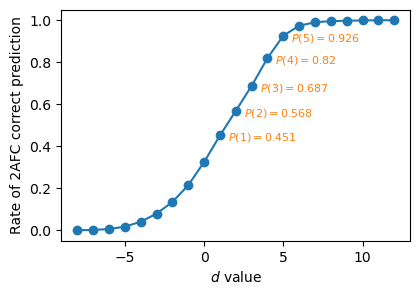

In [9]:
f,a = plt.subplots(figsize=(4.5,3))
a.plot(ds,ops,'o-')
a.set_xlabel('$d$ value')
a.set_ylabel('Rate of 2AFC correct prediction')
for d in range(1,6): # Show rates at some d values
    p = ops[list(ds).index(d)]
    a.text(d+.5,p-.01,f'$P({d}) = {p:.3g}$',va='center',ha='left',fontsize=8,color='C1')
plt.show()

# Test to predict $y$

In [10]:
d = 2
x,y = generate_data(10000,control=d) # Use more points for better precision

In [11]:
# Calculate empirical distribution
p_x,bin_edges = np.histogram(x,bin_num:=256,density=True)
bin_size = bin_edges[1]-bin_edges[0]

In [12]:
# Conditional distributions
p_x0 = np.histogram(x[y==0],bin_edges,density=True)[0]
p_x1 = np.histogram(x[y==1],bin_edges,density=True)[0]

In [13]:
xs = (bin_edges[:-1]+bin_edges[1:])/2 # Mid points of the bins

In [14]:
print(y_values:=np.unique(y))
p_y = np.array([(y==v).mean() for v in y_values])
print(p_y) # Marginal distribution for y

[0 1]
[0.5482 0.4518]


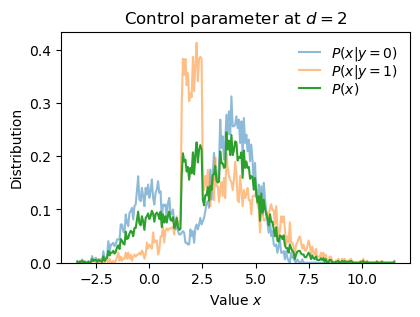

In [15]:
f,a = plt.subplots(figsize=(4.5,3))
a.plot(xs,p_x0,label='$P(x|y=0)$',alpha=.5)
a.plot(xs,p_x1,label='$P(x|y=1)$',alpha=.5)
a.plot(xs,p_x,label='$P(x)$')
a.legend(frameon=False,labelspacing=0,handlelength=1.5)
a.set_xlabel('Value $x$')
a.set_ylabel('Distribution')
a.set_ylim(0,)
a.set_title('Control parameter at $d=2$')
plt.show()

## Decision threshold in $x$

In [16]:
correct_rate = [ # Rates of correct prediction @ different thresholds
    ((x>z)==y).mean()
    for z in xs
]

In [17]:
from IPython.display import HTML

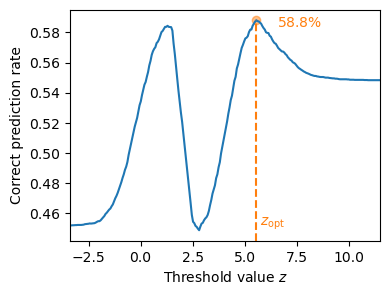

In [18]:
f,a = plt.subplots(figsize=(4,3))
a.plot(xs,correct_rate)
a.set_xlim(xs[0],xs[-1])
a.set_xlabel('Threshold value $z$')
a.set_ylabel('Correct prediction rate')
z_optimal = xs[i:=np.argmax(correct_rate)] # Best threshold
yr = a.get_ylim()
a.scatter(z_optimal,correct_rate[i],c='C1',alpha=.5)
a.vlines(z_optimal,yr[0],correct_rate[i],ls='--',color='C1')
a.annotate(
    r'$z_\mathrm{opt}$',(z_optimal,correct_rate[i]),
    xytext=(z_optimal+.2,yr[0]+.01),color='C1')
a.annotate(
    fr'${100*correct_rate[i]:4.3g}\%$',
    (z_optimal,correct_rate[i]),xytext=(z_optimal+1,correct_rate[i]-.004),
    color='C1')
a.set_ylim(yr)
plt.show()
display(HTML(fr'Best theshold at $z_\mathrm{{opt}}={z_optimal:.3g}$ with ${100*correct_rate[i]:4.3g}\%$ correct.'))

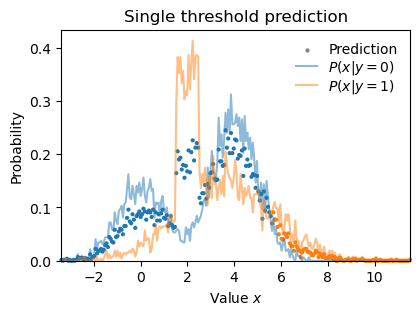

In [19]:
f,a = plt.subplots(figsize=(4.5,3))
a.scatter(xs,p_x,c=['C1' if x>z_optimal else 'C0' for x in xs],s=4,clip_on=False)
a.scatter([],[],s=4,c='gray',label='Prediction')
a.plot(xs,p_x0,label='$P(x|y=0)$',alpha=0.5)
a.plot(xs,p_x1,label='$P(x|y=1)$',alpha=0.5)
a.set_xlabel('Value $x$')
a.set_ylabel('Probability')
a.set_xlim(xs[0],xs[-1])
a.set_ylim(0,)
a.legend(frameon=False,labelspacing=0.125,handlelength=1.5)
a.set_title('Single threshold prediction')
plt.show()

## Likelihood method

In [20]:
log_like_ratios = np.log((p_x1+1e-30)/(p_x0+1e-30)) # log-likelihood ratio

In [21]:
log_like_limits = (-3,5) # Limits of log-likelihood radio to consider
log_like_values = np.linspace(*log_like_limits,257)
log_like_correct_rates = [ # Correct rate from likelihood
    ((np.take(log_like_ratios,((x-xs[0])/bin_size).astype(int))>ll)==y).mean()
    for ll in log_like_values
]

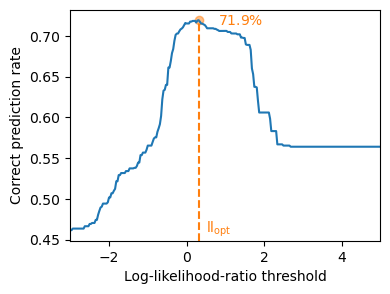

In [22]:
f,a = plt.subplots(figsize=(4,3))
a.plot(log_like_values,log_like_correct_rates)
a.set_xlabel('Log-likelihood-ratio threshold')
a.set_ylabel('Correct prediction rate')
a.set_xlim(log_like_limits)
log_like_optimal = log_like_values[i:=np.argmax(log_like_correct_rates)] # Best threshold
yr = a.get_ylim()
a.scatter(log_like_optimal,log_like_correct_rates[i],c='C1',alpha=.5)
a.vlines(log_like_optimal,yr[0],log_like_correct_rates[i],ls='--',color='C1')
a.annotate(
    r'$\mathrm{ll}_\mathrm{opt}$',(log_like_optimal,log_like_correct_rates[i]),
    xytext=(log_like_optimal+.2,yr[0]+.01),color='C1')
a.annotate(
    fr'${100*log_like_correct_rates[i]:4.3g}\%$',(log_like_optimal,log_like_correct_rates[i]),
    xytext=(log_like_optimal+.5,log_like_correct_rates[i]-.005),color='C1')
a.set_ylim(yr)
plt.show()
display(HTML(
    fr'Best theshold at $\mathrm{{ll}}={log_like_optimal:.3g}$'+
    fr' with ${100*log_like_correct_rates[i]:4.3g}\%$ correct.'))

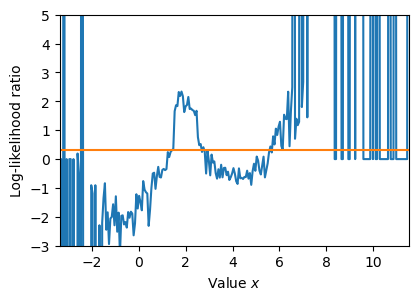

In [23]:
f,a = plt.subplots(figsize=(4.5,3))
a.plot(xs,log_like_ratios)
a.plot([xs[0],xs[-1]],[log_like_optimal,log_like_optimal])
a.set_ylim(log_like_limits)
a.set_xlim(xs[0],xs[-1])
a.set_ylabel('Log-likelihood ratio')
a.set_xlabel('Value $x$')
plt.show()

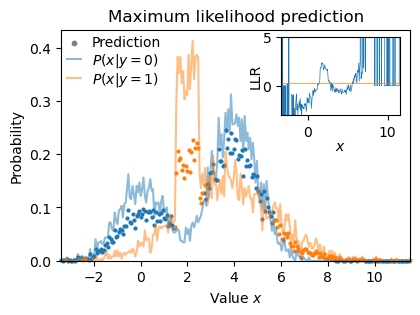

In [24]:
f,a = plt.subplots(figsize=(4.5,3))
a.scatter(xs,np.ma.masked_where(c:=log_like_ratios>log_like_optimal,p_x),s=4,clip_on=False)
a.scatter(xs,np.ma.masked_where(1-c,p_x),s=4,clip_on=False)
a.scatter([],[],s=10,c='gray',label='Prediction')
a.plot(xs,p_x0,label='$P(x|y=0)$',alpha=0.5)
a.plot(xs,p_x1,label='$P(x|y=1)$',alpha=0.5)
a.set_xlim(xs[0],xs[-1])
a.set_ylabel('Probability')
a.set_ylim(0,)
a.set_xlabel('Value $x$')
a.legend(frameon=False,labelspacing=0.125,handlelength=1,loc='upper left',borderaxespad=0)
a.set_title('Maximum likelihood prediction')
a = a.inset_axes([0.63,0.63,0.34,0.34])
a.plot(xs,log_like_ratios,lw=.5)
a.plot([xs[0],xs[-1]],[log_like_optimal,log_like_optimal],lw=.5)
a.set_ylim(log_like_limits)
a.set_xlim(xs[0],xs[-1])
a.set_ylabel('LLR',labelpad=0)
a.set_xlabel('$x$',labelpad=0)
plt.show()

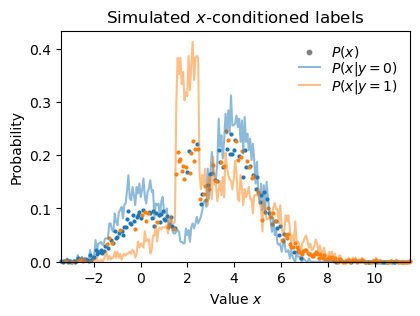

In [25]:
# Random assignment following ratio of probabilities, equal chance when both are zero
rng = np.random.default_rng(1234)
c = rng.uniform(size=len(p_x))*(p_x0+p_x1+2e-9)>p_x0+1e-9

f,a = plt.subplots(figsize=(4.5,3))
a.scatter(xs,np.ma.masked_where(c,p_x),s=4,clip_on=False)
a.scatter(xs,np.ma.masked_where(1-c,p_x),s=4,clip_on=False)
a.scatter([],[],s=10,c='gray',label='$P(x)$')
a.plot(xs,p_x0,label='$P(x|y=0)$',alpha=0.5)
a.plot(xs,p_x1,label='$P(x|y=1)$',alpha=0.5)
a.set_xlim(xs[0],xs[-1])
a.set_ylabel('Probability')
a.set_ylim(0,)
a.set_xlabel('Value $x$')
a.legend(frameon=False,labelspacing=0,handlelength=1.5)
a.set_title('Simulated $x$-conditioned labels')
plt.show()

# Mutual information

Using the 2D distribution from `code09.ipynb`

In [26]:
# Probability density function
def func(x,y):
    r = np.exp(-(x**2+y**2)/4-(x-2*np.sin(y))**2/.5)
    r += np.exp(-((x+4)**2+(y-1.57)**2)*2)/2
    r = r**0.25
    return r

In [27]:
rng = np.random.default_rng(1234)
# Generate 2x10^5 2D points which are then kept with the probability density 
ps = np.array([p for p in rng.uniform(-10,10,size=(200000,2)) if rng.uniform()<func(*p)])
print(ps.shape)
xs,ys = ps.T

(9957, 2)


In [28]:
# Calculate entropy of a probability distribution in bits,
def entropy2(a):
    '''Entropy of discrete probability distribution `a`, measured in bits

    Parameter
    =========
    a : Array of probabilities
    '''
    b = a[np.where(a>0)]
    return -np.sum(b*np.log2(b))

In [29]:
# Use np.histogram2d to calculate the mutual information
def mutual_info(a,b,bins=20):
    '''Calculate mutual information between two data arrays

    Parameters
    ==========
     a,b :  Two arrays

    Returns
    =======
     mi :  Mutual information
    '''
    pxy = np.histogram2d(a,b,bins)[0]
    pxy /= np.sum(pxy) # Joint probability
    px = pxy.sum(axis=1) # Marginal probability
    py = pxy.sum(axis=0) # Marginal probability
    return entropy2(px)+entropy2(py)-entropy2(pxy)

In [30]:
rng = np.random.default_rng(1234)
mi_xy = mutual_info(xs,ys) # Mutual info
mi_xy_base = np.array([
    mutual_info(xs,rng.permutation(ys)) # Randomly pair x and y
    for i in range(1000)
]).mean() # Base line

In [31]:
print(f'{mi_xy=:g}, {mi_xy_base=:g}')

mi_xy=0.554662, mi_xy_base=0.0252757


In [32]:
# Some random distribution of (s,r) pairs
rng = np.random.default_rng(1234)
s = rng.normal(size=4096)
r = (rng.normal(size=s.size)-s)/np.sqrt(2)

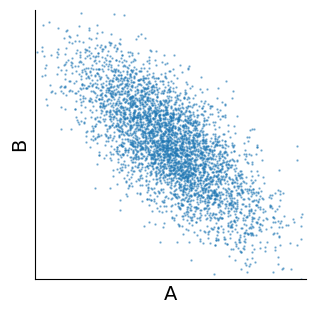

In [33]:
f,a = plt.subplots(figsize=(3.5,3.5))
a.scatter(s,r,s=0.5,alpha=0.5)
a.set_xlim(-3,3)
a.set_ylim(-3,3)
a.set_xticks([])
a.set_yticks([])
a.spines['right'].set_visible(False)
a.spines['top'].set_visible(False)
a.set_xlabel('A',fontsize=14)
a.set_ylabel('B',fontsize=14)
plt.show()

<hr>
<address style="color:#44f;font-style:italic;font-weight:bold;"><a href="https://cc.tir.tw/wk/2025cns">CNS2025</a></address>